$\textbf{TP n°2 - Statistiques}$
<br>Mohamed SANAD (MS BGD)

# Importation des paquets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sn
import scipy.stats as stat
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

Nous travaillons sur la base de données diabetes de python. La base initiale comporte n = 442 patients et p = 10 covariables. La variable Y à expliquer est un score correspondant à l’évolution de la maladie. Pour s’amuser, un robot malicieux a contaminé le jeu de données en y ajoutant 150 variables explicatives inappropriées. Ensuite, non-content d’avoir déjà perverti notre jeu de données, il a volontairement mélangé les variables entre elles de façon aléatoire. Bien entendu le robot a ensuite pris soin d’effacer toute trace de son acte crapuleux si bien que nous ne connaissons pas les variables pertinentes. La nouvelle base de données notée X comporte n = 442 patients et p = 160 covariables. Saurez-vous déjouer les plans de ce robot farceur et retrouver les variables pertinentes?

# Question 1 :

Importer la base de données data_contamine.csv disponible depuis le lien https://github.com/anassag/TP-reduction-dimension/blob/main/data_contamine.csv. La dernière colonne est la variable à expliquer. Les autres colonnes sont les variables explicatives.

In [2]:
df = pd.read_csv('data_contamine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,0.223773,2.407005,-0.536073,-1.336626,-0.097947,1.549540,1.590890,1.190101,-1.181936,2.731036,...,-1.157572,-0.316955,-1.041194,-0.929746,-1.779339,-1.429081,2.685259,0.953334,-0.564672,151.0
1,-0.515789,-0.799958,1.582195,-0.008126,0.414271,1.363709,-0.098582,-0.302917,-0.544602,-0.241896,...,0.241794,-0.937335,0.288955,-0.177624,0.084456,0.633965,1.052004,-0.113860,0.505908,75.0
2,0.023454,0.048646,0.224159,0.655717,-0.176065,1.605403,1.638630,-1.240650,2.100396,-1.031570,...,0.483655,0.869513,0.881769,-0.958674,1.880679,0.608850,-0.057137,-0.950829,-0.594289,141.0
3,0.892292,-0.494714,-1.062153,0.736429,-0.118200,-1.078412,-0.454316,-0.378080,2.679422,-0.051751,...,0.385350,-0.021720,0.863478,0.256292,0.293780,0.216499,-0.637889,-1.179666,-1.112571,206.0
4,-1.021634,-1.805761,0.082164,0.387965,-0.838219,1.596253,0.037945,-1.012175,1.632963,-0.533814,...,0.661239,0.329027,-0.757433,0.082726,0.267892,0.282614,-2.022049,-2.201643,0.786962,135.0


Vérifiez le nombre de variables explicatives et le nombre d’observations :

In [3]:
# Variables explicatives
print("Nombre de variables explicatives = "+str(df.shape[1]-1))

# Observations
n = len(df)
print("Nombre d'observations = "+str(n))

Nombre de variables explicatives = 160
Nombre d'observations = 442


# Question 2 :

Les variables explicatives sont-elles centrées ? Normalisées ? 

In [4]:
print("Max des moyennes (en valeur absolue) des variables explicatives = "+str(df.describe().iloc[1,:-1].abs().max()))

Max des moyennes (en valeur absolue) des variables explicatives = 6.430251002353848e-17


Ainsi, toutes les variables explicatives ont des moyennes qui sont inférieures à ${1.10}^{-16}$ (en valeur absolue).

In [5]:
(df.describe().iloc[1,:-1].abs() < 1e-16).all()

True

On peut dire qu'elles sont centrées. Vérifions maintenant si elles sont normalisées. Pour ce faire, on doit vérifier si leurs écarts-types sont égaux à 1.

In [6]:
print("Min (écarts-types) = "+str((df.describe().iloc[2,:-1]).min()))
print("Max (écarts-types) = "+str((df.describe().iloc[2,:-1]).max()))

Min (écarts-types) = 1.0011331448394587
Max (écarts-types) = 1.0011331448394591


Toutes les variables explicatives ont des écarts-types qui sont à-peu-près égaux à 1.001. On peut donc considérer qu'elles sont normalisées.

Qu’en est-il de la variable à expliquer ?

In [7]:
print("Moyenne de la variable à expliquer = "+str(df.describe().iloc[1,-1]))
print("Ecart-type de la variable à expliquer = "+str(df.describe().iloc[2,-1]))

Moyenne de la variable à expliquer = 152.13348416289594
Ecart-type de la variable à expliquer = 77.09300453299109


In [8]:
if abs(df.describe().iloc[1,-1]) > 1e-03:
    print("La variable à expliquer n'est pas centrée")

if abs(df.describe().iloc[2,-1] - 1) > 1e-03:
    print("La variable à expliquer n'est pas normalisée")

La variable à expliquer n'est pas centrée
La variable à expliquer n'est pas normalisée


Tracer un scatter plot de la base de données avec 4 covariables prises au hasard et la variable à
expliquer (un scatterplot regroupe les graphes de chacune des variables en fonction de chacune des
autres).

In [9]:
covariables = random.choices(df.columns.tolist(), k = 4)
covariables

[2, 24, 57, 87]

In [10]:
df.iloc[:,covariables + [df.shape[1]-1]]

,2,24,57,87,160
0,-0.536073,-0.700607,-0.396750,-2.758978,151.0
1,1.582195,1.544020,0.328821,0.344614,75.0
2,0.224159,1.411618,-0.786989,-0.228690,141.0
3,-1.062153,-0.503609,-0.459265,-0.297035,206.0
4,0.082164,0.761484,-0.592820,-0.218839,135.0
...,...,...,...,...,...
437,-1.563688,-0.871502,-0.278370,0.544849,178.0
438,-1.601002,-1.127198,-0.443669,0.757778,104.0
439,0.427710,-0.670137,0.185204,-0.596407,132.0
440,-0.088368,-0.534839,2.156565,-0.237344,220.0


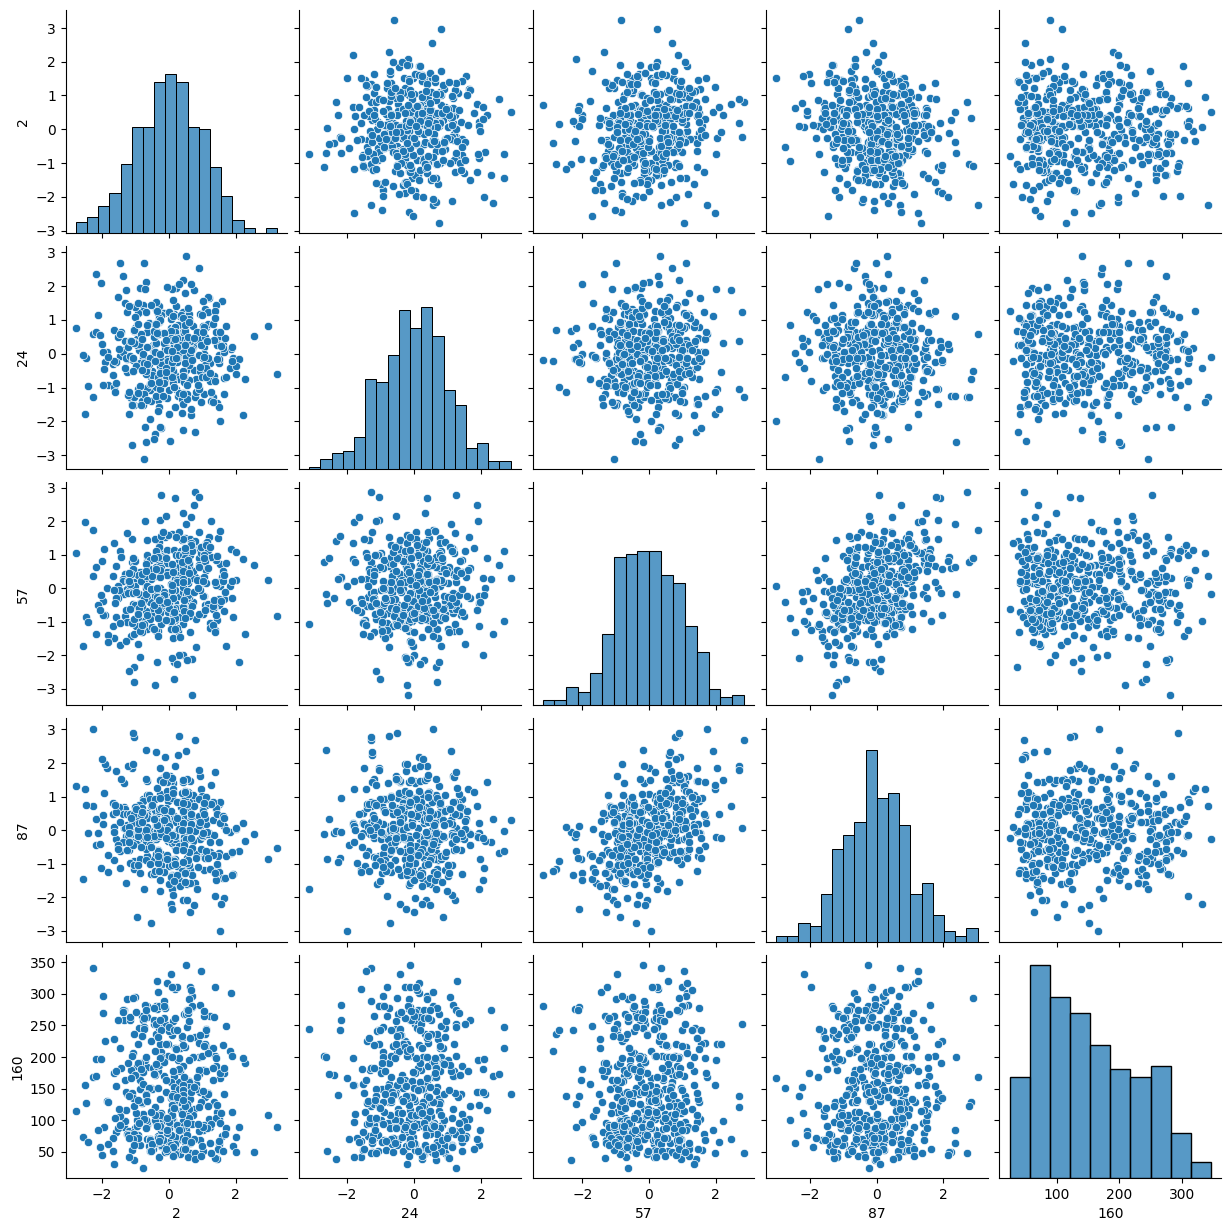

In [11]:
sn.pairplot(df.iloc[:,covariables + [df.shape[1]-1]])

<AxesSubplot: >

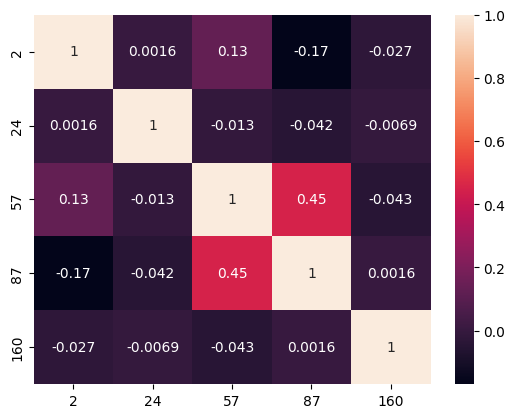

In [12]:
sn.heatmap(df.iloc[:,covariables + [df.shape[1]-1]].corr(), annot = True)

Commenter les graphiques obtenus.

➜ On remarque clairement que la variable à expliquer ne suit pas une loi normale.

In [13]:
(covariables + [df.shape[1]-1])[:4]

[2, 24, 57, 87]

➜ $\textbf{Test de corrélation nulle :}$
<br><br>H0 : Les variables sont indépendantes (corrélation nulle)
<br>H1 : Les variables sont corrélées (corrélation non nulle)

La p_value peut s'interpréter comme étant la probabilité que H0 soit vraie (que les variables soient indépendantes).

In [14]:
print("On veut tester les corrélations entre chacune des 4 covariables et la variable à expliquer :")
for i in (covariables + [df.shape[1]-1])[:4]:
    r = df[i].corr(df[160])
    t =  (r*math.sqrt(n-2)) / math.sqrt(1 - r**2)
    p_value = stat.t.sf(abs(t), df=n-2)*2

    print("\nPour la variable "+str(i)+", on a :")
    print("\tStatistique de test t = "+str(round(t, 6)))
    print("\tp_value = "+str(round(p_value*100, 3))+"%")

On veut tester les corrélations entre chacune des 4 covariables et la variable à expliquer :

Pour la variable 2, on a :
	Statistique de test t = -0.567786
	p_value = 57.047%

Pour la variable 24, on a :
	Statistique de test t = -0.144586
	p_value = 88.51%

Pour la variable 57, on a :
	Statistique de test t = -0.897604
	p_value = 36.989%

Pour la variable 87, on a :
	Statistique de test t = 0.034257
	p_value = 97.269%


# Question 3 :

Echantillon d’apprentissage et de test. Créer 2 échantillons : un pour apprendre le modèle ${X}_{train}$,
un pour tester le modèle ${X}_{test}$. On mettra 25% de la base dans l’échantillon ’test’. 

In [15]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

Donner les tailles de chacun des 2 échantillons.

In [17]:
n_train = len(X_train)
n_test = len(X_test)

print("Taille de l'échantillon d'entrainement = " +str(n_train)+" --> "+str(round(n_train*100/n ,2))+" %")
print("Taille de l'échantillon de test = " +str(n_test)+" --> "+str(round(n_test*100/n ,2))+" %")

Taille de l'échantillon d'entrainement = 331 --> 74.89 %
Taille de l'échantillon de test = 111 --> 25.11 %


On notera que le nouvel échantillon de covariables ${X}_{train}$ n’est pas
normalisé. Dans la suite, on fera donc bien attention à inclure l’intercept dans nos régressions.

In [18]:
print("Max des moyennes (en valeur absolue) des variables explicatives = "+str(X_train.describe().iloc[1].abs().max()))
print("Min (écarts-types) = "+str((X_train.describe().iloc[2]).min()))
print("Max (écarts-types) = "+str((X_train.describe().iloc[2]).max()))

Max des moyennes (en valeur absolue) des variables explicatives = 0.06795037385717505
Min (écarts-types) = 0.9559583939539102
Max (écarts-types) = 1.059327956715958


# Question 4 :

Donner la matrice de covariance calculée sur ${X}_{train}$.

In [19]:
COV_X_train = (1/n_train) * (X_train.T @ X_train)
COV_X_train

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,0.982428,0.290551,0.015825,0.282807,0.097987,-0.105376,0.078676,0.292038,-0.087453,-0.058441,...,-0.053666,0.102242,0.213870,0.171888,0.050556,0.211543,0.246362,-0.085508,0.030032,-0.072808
1,0.290551,0.996517,0.196176,-0.235087,0.056655,0.186739,0.163110,-0.032192,-0.200129,0.023167,...,-0.014117,0.176187,0.188707,0.023059,0.058407,0.114820,0.135056,0.095564,0.192689,-0.124963
2,0.015825,0.196176,1.045000,-0.120089,0.252077,0.350064,-0.338662,0.045957,-0.184695,-0.355244,...,0.075683,-0.256529,-0.047713,0.391481,0.012548,0.076791,0.179534,0.215990,-0.045167,0.342695
3,0.282807,-0.235087,-0.120089,0.992732,0.125063,-0.247932,0.146232,0.485589,0.088330,-0.220497,...,-0.299344,-0.265631,0.230883,-0.226865,0.072694,0.350238,0.078111,0.161575,-0.142215,-0.008775
4,0.097987,0.056655,0.252077,0.125063,1.000253,-0.249868,-0.106762,-0.359998,-0.374643,-0.009120,...,-0.066809,-0.212518,0.400324,0.130426,-0.027573,0.116533,-0.063913,0.055371,0.078067,0.248284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.211543,0.114820,0.076791,0.350238,0.116533,-0.108463,0.245774,0.125929,0.180634,-0.234560,...,-0.054080,0.077003,0.237563,0.490560,0.022758,1.041864,-0.031217,0.037884,-0.013711,-0.142947
156,0.246362,0.135056,0.179534,0.078111,-0.063913,-0.127827,-0.068915,0.027722,0.168257,-0.151250,...,0.068715,-0.327446,-0.102164,0.056265,-0.017727,-0.031217,0.968212,0.116541,0.028462,-0.080808
157,-0.085508,0.095564,0.215990,0.161575,0.055371,0.018100,0.140670,0.259431,-0.166176,0.100709,...,-0.574467,-0.370892,-0.155805,0.032927,0.024814,0.037884,0.116541,0.987610,0.044757,-0.039597
158,0.030032,0.192689,-0.045167,-0.142215,0.078067,-0.064702,0.126966,0.298139,-0.544123,0.094512,...,0.136523,-0.087442,-0.182012,0.230887,-0.107494,-0.013711,0.028462,0.044757,1.034312,0.045129


Tracer le graphe de la décroissance des valeurs propres de la matrice de covariance

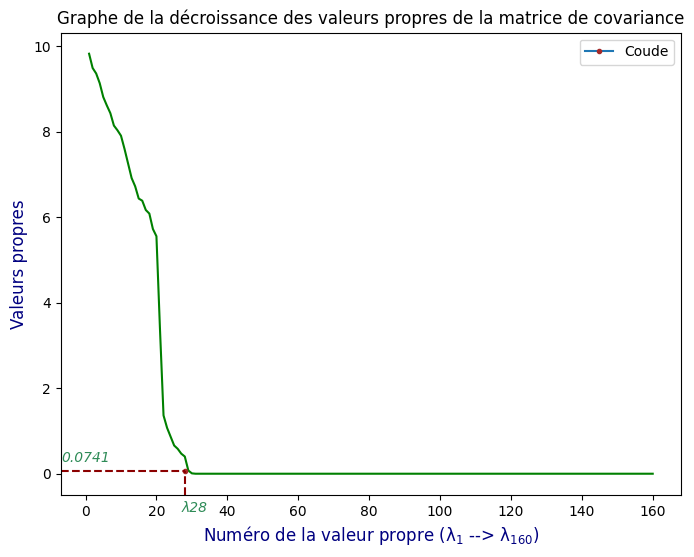

In [20]:
val_prop = np.flip(np.linalg.eigh(COV_X_train)[0] , axis=0)

fig = plt.figure(figsize=(8,6))

plt.plot([i for i in range(1,161)], val_prop, color='green')

plt.plot(28, val_prop[28], marker='o', markersize=3, markeredgecolor='brown', markerfacecolor='brown', label="Coude")

axes = plt.gca()
x_min, x_max = axes.get_xlim()
y_min, y_max = axes.get_ylim()

xmax = (28-x_min)/(x_max-x_min)
ymax = (val_prop[28]-y_min)/(y_max-y_min)

plt.axhline(y=val_prop[28], xmin=0, xmax=xmax, linestyle='--', color='darkred')
plt.axvline(x=28, ymin=0, ymax=ymax, linestyle='--', color='darkred')

plt.text(x_min+0.15, val_prop[28]+0.2, round(val_prop[28],4), fontstyle='italic', color='seagreen', fontsize=10)
plt.text(28-0.9, y_min-0.4, "λ"+str(28), fontstyle='italic', color='seagreen', fontsize=10)

plt.title("Graphe de la décroissance des valeurs propres de la matrice de covariance")
plt.xlabel("Numéro de la valeur propre (λ$_{%d}$"%1+" --> λ$_{%d}$"%160+")", color='navy', fontsize=12)
plt.ylabel("Valeurs propres", color='navy', fontsize=12)

plt.legend(loc='upper right')

plt.show()

Expliquer pourquoi il est légitime de ne garder que les premières variables de l’ACP.

Les valeurs propres représentent les variances des axes correspondants. La proportion de la variance expliquée par chaque variable est égale à la valeur propre associée divisée par l'inertie totale (somme de toutes les valeurs propres). D'après ce schéma, on peut voir que les premières variables sont ceux qui ont un pouvoir explicatif fort car elles ont une proportion d'inertie élevée. Il existe divers méthodes pour choisir le nombre de variables à retenir.
<br><br>➜ Méthode du coude : On ne conserve que les 27 premières variables (voir graphique).
<br>➜ Inertie moyenne par variable : On calcule l'inertie moyenne par variable (Inertie totale / Nombre de variables) et on ne conserve que les variables qui ont des valeurs propres supérieures à cette mesure. Le nombre de variables qu'on retient en utilisant cette méthode est égal à 23 :

In [21]:
Inertie_totale = val_prop.sum()
p = len(val_prop) # Nombre de variables
Inertie_moyenne = Inertie_totale / p

print("Nombre de variables à retenir = "+str(sum(map(lambda x : x > Inertie_moyenne, val_prop))))

Nombre de variables à retenir = 23


On gardera 20 variables dans la suite.

In [22]:
val_prop = np.flip(np.linalg.eigh(COV_X_train)[0] , axis=0)[:20]
proportions_inertie = [val/Inertie_totale for val in val_prop]

In [23]:
pd.DataFrame(data = {'Valeur propre': list(np.around(val_prop, 5)),
                     'Proportion': list(np.around(np.array(proportions_inertie), 5)),
                     'Proportions cumulées' : list(np.around(np.cumsum(proportions_inertie), 5))},
            index = ['Axe'+str(i) for i in range(1,21)],)

,Valeur propre,Proportion,Proportions cumulées
Axe1,9.82315,0.06084,0.06084
Axe2,9.48901,0.05877,0.11961
Axe3,9.36046,0.05797,0.17759
Axe4,9.13354,0.05657,0.23416
Axe5,8.80981,0.05456,0.28872
Axe6,8.61409,0.05335,0.34207
Axe7,8.43259,0.05223,0.39430
Axe8,8.14298,0.05043,0.44473
Axe9,8.03294,0.04975,0.49449
Axe10,7.90502,0.04896,0.54345


Avec 20 variables, on réussit à expliquer 94% de la variance totale.

# Question 5 :

Suivant les observations de la question (Q4), appliquer la méthode de "PCA before OLS" qui
consiste à appliquer OLS avec Y et ${X}_{train}$.${V}_{[1:20]}$
, où ${V}_{[1:20]}$ contient les vecteurs propres (associés
aux 20 plus grandes valeurs propres) de la matrice de covariance. 

In [24]:
V_1_20 = np.transpose(np.flip(np.linalg.eigh(COV_X_train)[1] , axis=0)[:20])

X_train_PCA = np.dot(X_train, V_1_20)

pd.DataFrame(data = X_train_PCA,
             columns = ['Axe'+str(i) for i in range(1,21)])

,Axe1,Axe2,Axe3,Axe4,Axe5,Axe6,Axe7,Axe8,Axe9,Axe10,Axe11,Axe12,Axe13,Axe14,Axe15,Axe16,Axe17,Axe18,Axe19,Axe20
0,1.514885,-0.716720,0.810863,0.562557,-1.415340,-0.730060,-0.436760,-0.457335,-0.592391,0.056849,1.025139,-0.374204,-0.190378,0.034312,1.712849,0.014814,-0.800895,-0.028088,1.079143,0.464801
1,-0.315126,1.205468,1.915987,-0.528883,0.158600,-1.304674,0.295600,0.158294,1.001349,0.072198,0.662336,-0.230284,0.155255,0.022239,0.131976,0.332120,-1.002495,-0.657499,-0.535581,-1.197252
2,0.762187,-0.134747,-0.354944,0.598386,-0.728356,-1.172428,0.235806,0.388906,-0.405660,0.247386,-0.129833,-0.075527,0.030013,-0.731215,0.914477,0.034464,-0.106515,0.437246,0.378640,0.434784
3,1.359618,1.596923,1.200795,-0.108865,1.288072,-2.109814,-2.140440,1.007825,0.688381,-1.429162,1.319184,1.523677,0.505483,3.071157,1.487539,-1.002358,-1.240710,2.258961,-0.683935,0.370101
4,-0.221294,-0.457881,-1.518226,0.468436,-2.039951,-0.023932,1.416295,-1.018912,-1.914846,1.576425,-0.848665,-0.605391,-0.028639,-0.942495,-0.763843,-0.741207,0.726841,0.070461,0.644275,-0.885888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,-1.062315,0.801587,-1.310346,0.517464,0.511026,0.558783,0.570695,-0.159939,2.018348,-1.019349,-0.412143,-0.455287,-1.908156,1.012083,0.443206,-0.172596,0.464239,-1.490699,-0.823222,-2.637527
327,0.154467,-1.371127,-0.386975,0.744605,0.094547,-0.955250,-0.626925,1.600293,-1.265774,-0.486376,0.472434,-0.169235,-0.131076,-0.418169,0.383732,0.947514,0.850373,0.281872,-0.772592,0.464781
328,-0.338097,-0.825326,-0.444214,-0.213087,0.657265,1.944666,0.397067,-0.049371,0.143273,0.554430,-0.048843,-0.915267,0.076330,-0.122603,0.536556,0.821693,0.693978,-1.517351,0.462434,-0.480799
329,-1.067841,0.295340,-0.539938,0.164604,-1.644302,1.754805,0.361916,-1.048120,-0.391876,0.001573,-0.292416,-0.985977,1.358601,-1.170089,-1.550625,-0.546078,-0.930859,-1.940078,2.988905,-1.048081


Faire une régression linéaire (avec
intercept), puis tracer les valeurs des coefficients (hors intercept)

In [25]:
reg_PCA = lm.LinearRegression(fit_intercept=True)
reg_PCA.fit(X_train_PCA, y_train)

reg_PCA.score(X_train_PCA, y_train)

0.42679009209366703

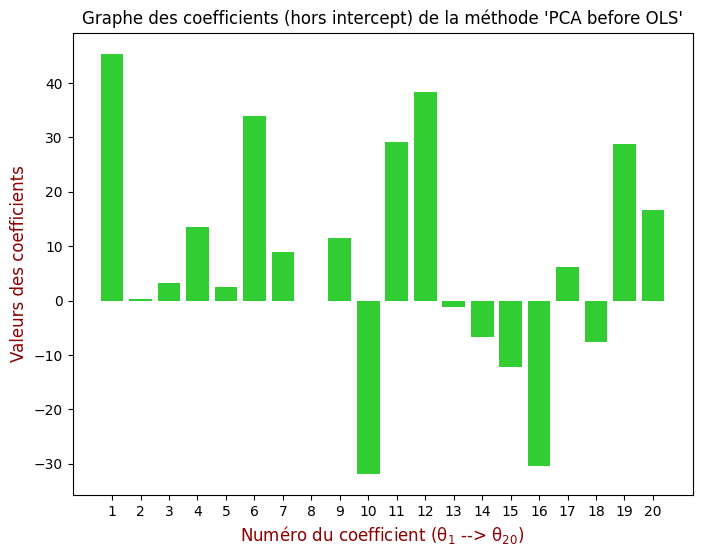

In [26]:
fig = plt.figure(figsize=(8,6))

plt.bar([i for i in range(1,21)], reg_PCA.coef_, color='limegreen')
plt.xticks([i for i in range(1,21)])

plt.title("Graphe des coefficients (hors intercept) de la méthode 'PCA before OLS'")
plt.xlabel("Numéro du coefficient (θ$_{%d}$"%1+" --> θ$_{%d}$"%20+")", color='darkred', fontsize=12)
plt.ylabel("Valeurs des coefficients", color='darkred', fontsize=12)

plt.show()

Sur un autre graphique, faire de même avec la méthode des moindres carrés classique.

In [27]:
reg = lm.LinearRegression(fit_intercept=True)
reg.fit(X_train, y_train)

reg.score(X_train, y_train)

0.5889573696984851

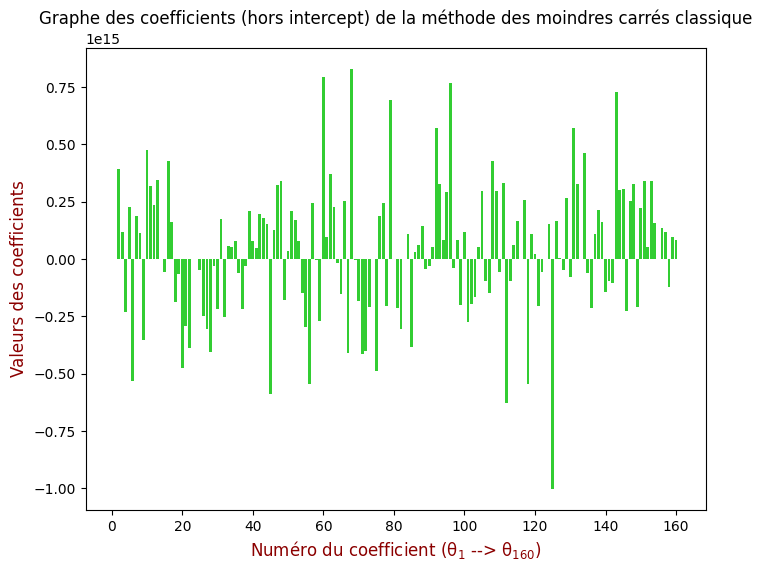

In [28]:
fig = plt.figure(figsize=(8,6))

plt.bar([i for i in range(1,161)], reg.coef_, color='limegreen')

plt.title("Graphe des coefficients (hors intercept) de la méthode des moindres carrés classique")
plt.xlabel("Numéro du coefficient (θ$_{%d}$"%1+" --> θ$_{%d}$"%160+")", color='darkred', fontsize=12)
plt.ylabel("Valeurs des coefficients", color='darkred', fontsize=12)

plt.show()

# Question 6 :

Donner les valeurs des intercepts pour les 2 régressions précédentes. 

In [29]:
print("Intercept (PCA before OLS) : "+str(reg_PCA.intercept_))
print("Intercept (OLS classique) : "+str(reg.intercept_))

Intercept (PCA before OLS) : 153.60990812551162
Intercept (OLS classique) : 154.68868013595167


Donner la valeur moyenne de la variable Y (sur le train set). 

In [30]:
print("La valeur moyenne de la variable Y (sur le train set) = "+str(y_train.mean()))

La valeur moyenne de la variable Y (sur le train set) = 155.32930513595167


Les intercepts des 2 questions sont-ils égaux ? Commenter.

➜ Les intercepts ne sont pas égaux car les données d'entrainement ne sont pas normalisées. Comme les variables explicatives sont 'presque' centrées, les valeurs des intercepts sont tout de même proches de la moyenne des Y.

Uniquement pour cette question, centrer et réduire les variables après ACP (de petite dimension).
Faire une régression avec ces variables et vérifier que l’intercept est bien égal à la moyenne de Y
sur le train.

In [31]:
# Centrage et réduction

scaler = StandardScaler()
X_train_PCA_std = scaler.fit_transform(X_train_PCA)

In [32]:
# Régression

reg_PCA_std = lm.LinearRegression(fit_intercept=True)
reg_PCA_std.fit(X_train_PCA_std, y_train)

reg_PCA_std.score(X_train_PCA_std, y_train)

0.4267900920936669

In [33]:
print("Intercept (PCA before OLS) using standardized variables : "+str(reg_PCA_std.intercept_))

Intercept (PCA before OLS) using standardized variables : 155.32930513595167


In [34]:
reg_PCA_std.intercept_ == y_train.mean()

True

L’intercept est bien égal à la moyenne de Y sur le train. Çela est dû au fait que nos variables explicatives sont centrées et réduites. 

# Question 7 :

Pour les 2 méthodes (OLS et PCA before OLS) :

➤ Tracer les résidus de la prédiction sur l’échantillon test.

1- OLS :

In [35]:
y_test_pred = reg.predict(X_test)
error_test = y_test - y_test_pred

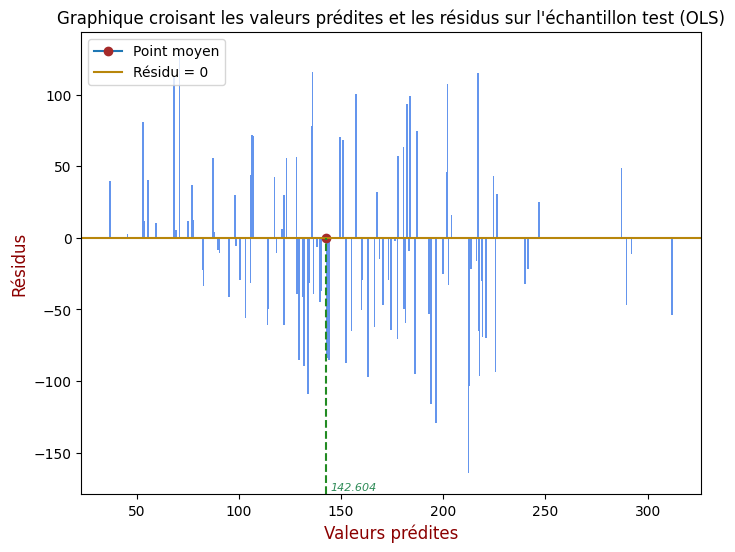

In [36]:
fig = plt.figure(figsize=(8,6))

plt.bar(y_test_pred, error_test, color='cornflowerblue')

plt.plot(y_test.mean(), 0, marker='o', markeredgecolor='brown', markerfacecolor='brown', label="Point moyen")

plt.axhline(y=0, xmin=0, xmax=1, color='darkgoldenrod', label="Résidu = 0")

axes = plt.gca()
y_min, y_max = axes.get_ylim()

ymax = -y_min / (y_max-y_min)

plt.axvline(x=y_test.mean(), ymin=0, ymax=ymax, linestyle='--', color='forestgreen')

plt.text(y_test.mean()+2, y_min+3, str(round(y_test.mean(),3)), fontstyle='italic', color='seagreen', fontsize=8)

plt.title("Graphique croisant les valeurs prédites et les résidus sur l'échantillon test (OLS)")
plt.xlabel("Valeurs prédites", color='darkred', fontsize=12)
plt.ylabel("Résidus", color='darkred', fontsize=12)

plt.legend(loc='upper left')

plt.show()

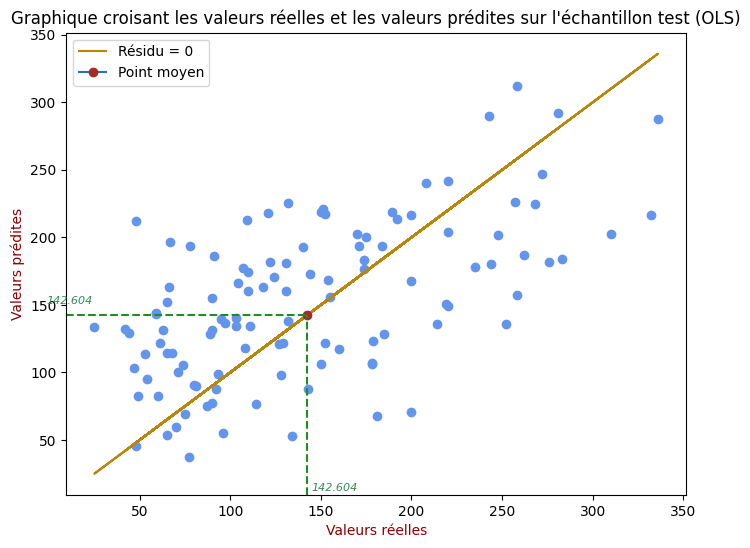

In [37]:
fig = plt.figure(figsize=(8,6))

plt.plot(y_test, y_test_pred, 'o', color="cornflowerblue")

plt.plot(y_test, y_test, color='darkgoldenrod', label="Résidu = 0")

plt.plot(y_test.mean(), y_test.mean(), marker='o', markeredgecolor='brown', markerfacecolor='brown', label="Point moyen")

axes = plt.gca()
x_min, x_max = axes.get_xlim()
y_min, y_max = axes.get_ylim()

xmax = (y_test.mean()-x_min)/(x_max-x_min)
ymax = (y_test.mean()-y_min)/(y_max-y_min)

plt.axhline(y=y_test.mean(), xmin=0, xmax=xmax, linestyle='--', color='forestgreen')
plt.axvline(x=y_test.mean(), ymin=0, ymax=ymax, linestyle='--', color='forestgreen')

plt.text(x_min-11, y_test.mean()+8, str(round(y_test.mean(),3)), fontstyle='italic', color='seagreen', fontsize=8)
plt.text(y_test.mean()+2, y_min+3, str(round(y_test.mean(),3)), fontstyle='italic', color='seagreen', fontsize=8)

plt.title("Graphique croisant les valeurs réelles et les valeurs prédites sur l'échantillon test (OLS)")
plt.xlabel("Valeurs réelles", color='darkred')
plt.ylabel("Valeurs prédites", color='darkred')

plt.legend(loc='upper left')

plt.show()

2- PCA before OLS :

In [38]:
# PCA before OLS

X_test_PCA = np.dot(X_test, V_1_20)

y_test_PCA_pred = reg_PCA.predict(X_test_PCA)
error_test_PCA = y_test - y_test_PCA_pred

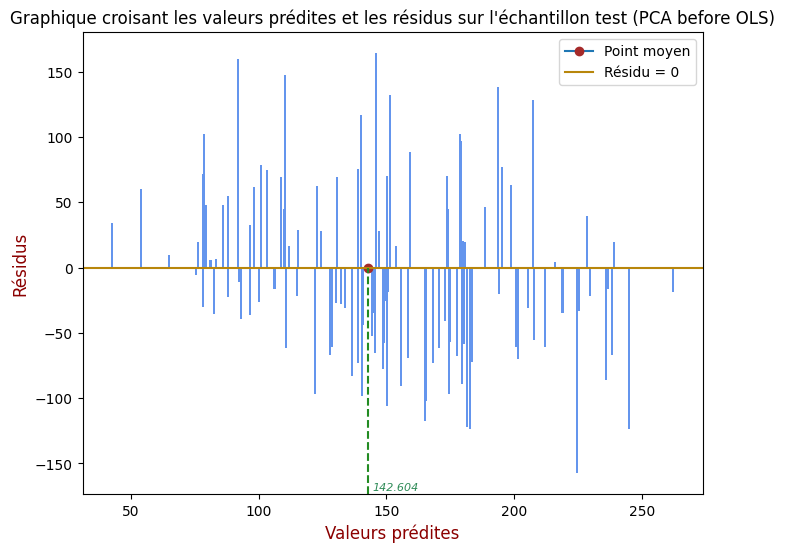

In [39]:
fig = plt.figure(figsize=(8,6))

plt.bar(y_test_PCA_pred, error_test_PCA, color='cornflowerblue')

plt.plot(y_test.mean(), 0, marker='o', markeredgecolor='brown', markerfacecolor='brown', label="Point moyen")

plt.axhline(y=0, xmin=0, xmax=1, color='darkgoldenrod', label="Résidu = 0")

axes = plt.gca()
y_min, y_max = axes.get_ylim()

ymax = -y_min / (y_max-y_min)

plt.axvline(x=y_test.mean(), ymin=0, ymax=ymax, linestyle='--', color='forestgreen')

plt.text(y_test.mean()+2, y_min+3, str(round(y_test.mean(),3)), fontstyle='italic', color='seagreen', fontsize=8)

plt.title("Graphique croisant les valeurs prédites et les résidus sur l'échantillon test (PCA before OLS)")
plt.xlabel("Valeurs prédites", color='darkred', fontsize=12)
plt.ylabel("Résidus", color='darkred', fontsize=12)

plt.legend(loc='upper right')

plt.show()

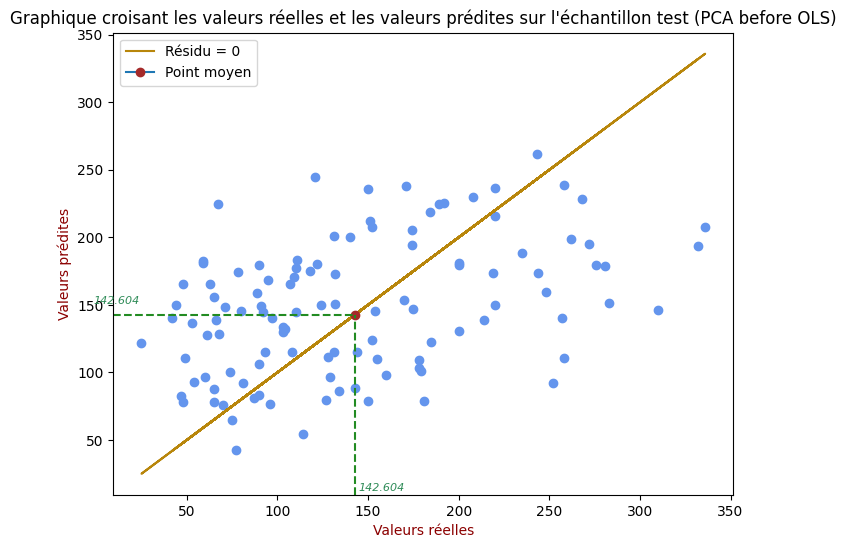

In [40]:
fig = plt.figure(figsize=(8,6))

plt.plot(y_test, y_test_PCA_pred, 'o', color="cornflowerblue")

plt.plot(y_test, y_test, color='darkgoldenrod', label="Résidu = 0")

plt.plot(y_test.mean(), y_test.mean(), marker='o', markeredgecolor='brown', markerfacecolor='brown', label="Point moyen")

axes = plt.gca()
x_min, x_max = axes.get_xlim()
y_min, y_max = axes.get_ylim()

xmax = (y_test.mean()-x_min)/(x_max-x_min)
ymax = (y_test.mean()-y_min)/(y_max-y_min)

plt.axhline(y=y_test.mean(), xmin=0, xmax=xmax, linestyle='--', color='forestgreen')
plt.axvline(x=y_test.mean(), ymin=0, ymax=ymax, linestyle='--', color='forestgreen')

plt.text(x_min-11, y_test.mean()+8, str(round(y_test.mean(),3)), fontstyle='italic', color='seagreen', fontsize=8)
plt.text(y_test.mean()+2, y_min+3, str(round(y_test.mean(),3)), fontstyle='italic', color='seagreen', fontsize=8)

plt.title("Graphique croisant les valeurs réelles et les valeurs prédites sur l'échantillon test (PCA before OLS)")
plt.xlabel("Valeurs réelles", color='darkred')
plt.ylabel("Valeurs prédites", color='darkred')

plt.legend(loc='upper left')

plt.show()

➤ Tracer leur densité.

1- OLS :

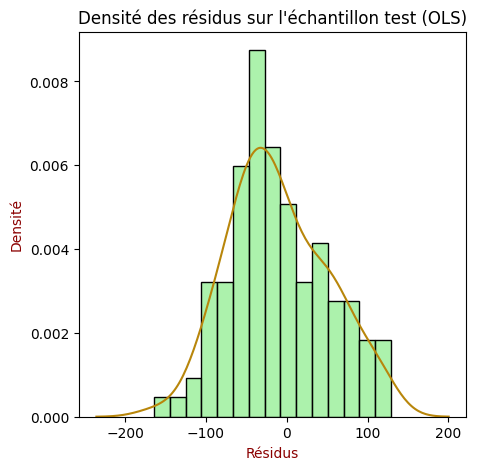

In [41]:
plt.figure(figsize=(5,5))

sn.histplot(error_test, color='lightgreen', bins=15, stat='density')
sn.kdeplot(error_test, color='darkgoldenrod')

plt.title("Densité des résidus sur l'échantillon test (OLS)")
plt.xlabel('Résidus', color='darkred')
plt.ylabel('Densité', color='darkred')

plt.show()

2- PCA before OLS :

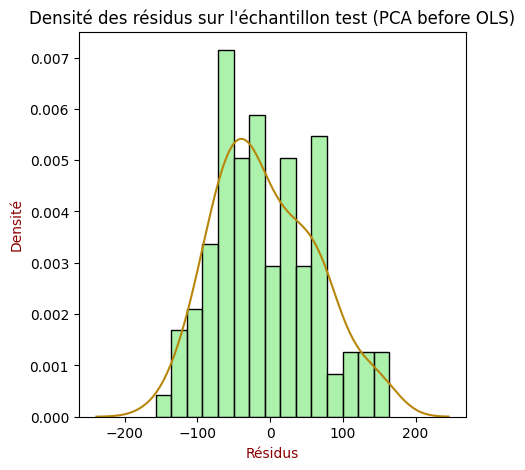

In [42]:
plt.figure(figsize=(5,5))

sn.histplot(error_test_PCA, color='lightgreen', bins=15, stat='density')
sn.kdeplot(error_test_PCA, color='darkgoldenrod')

plt.title("Densité des résidus sur l'échantillon test (PCA before OLS)")
plt.xlabel('Résidus', color='darkred')
plt.ylabel('Densité', color='darkred')

plt.show()

➤ Calculer le coefficient de détermination sur l’échantillon test :

1- OLS :

In [43]:
R2 = r2_score(y_test, y_test_pred)

print("Coefficient de détermination R2 (OLS) = "+str(round(R2*100, 2))+"%")

Coefficient de détermination R2 (OLS) = 29.14%


2- PCA before OLS :

In [44]:
R2_PCA = r2_score(y_test, y_test_PCA_pred)

print("Coefficient de détermination R2 (PCA before OLS) = "+str(round(R2_PCA*100, 2))+"%")

Coefficient de détermination R2 (PCA before OLS) = 9.06%


➤ Calculer le risque de prédiction sur l’échantillon test.

1- OLS :

In [45]:
mse = np.sum((y_test - y_test_pred)**2) / len(y_test)

print("MSE (OLS) = "+str(round(mse, 5)))

MSE (OLS) = 3780.81898


2- PCA before OLS :

In [46]:
mse_PCA = np.sum((y_test - y_test_PCA_pred)**2) / len(y_test)

print("MSE (PCA before OLS) = "+str(round(mse_PCA, 5)))

MSE (PCA before OLS) = 4852.60572


# Question 8 :

Coder la méthode de Forward variable sélection. On pourra utiliser la statistique du test de nullité
du coefficient (comme vu en cours). Pour l’instant, on ne met pas de critère d’arrêt sur la méthode, c’est-à-dire que l’on ajoute une variable à chaque étape jusqu’à retrouver la totalité des variables

➤ On commence par un modèle qui contient 0 variables.
<br>➤ À chaque étape, une variable est ajoutée au modèle. C'est celle qui a la plus petite p-valeur associée au test de nullité du coefficient (test de Student).
<br>➤ On s'arrête lorsqu'on aura introduit toutes les variables.

In [47]:
# Covariables
X = df.iloc[:,:-1]

# Covariables avec intercept
Z = np.concatenate((np.full((X.shape[0], 1), 1), X), axis=1)

# Variable à expliquer
y = df.iloc[:,-1]

In [48]:
# Fonction qui retourne l'estimation du coefficient de régression βj :
def reg_coef(z, y):

    reg = lm.LinearRegression().fit(z.reshape(-1,1), y)
    b = reg.coef_[0]
    
    return b

# Fonction qui retourne la statistique de test et la p_value associées à un coefficient de régression βj :
def t_score_p_value(z, y):
   
    n = z.shape[0] # 442
    b = reg_coef(z, y) # Coefficient de régression
    y_pred = b * z # Valeurs prédites par le modèle
    erreur = y - y_pred # Résidus
    sigma = np.sqrt(np.dot(erreur.T , erreur) / (n-1)) # Ecart-type estimé de l'erreur
    G = (1/n) * (np.dot(z.T, z)) # Matrice de Gram
    G_inv = np.linalg.inv(np.array(G).reshape(-1,1))[0][0] # Inverse de la matrice de Gram
    t_score = (np.sqrt(n)*b) / np.sqrt((sigma**2)*G_inv) # Statistique du test de nullité du coefficient b
    p_value = stat.t.sf(abs(t_score), df=n-1)*2 # p_value associée
    
    return t_score, p_value

In [49]:
# Une étape du forward variable selection
def one_step_forward(list_features, y): # liste des variables non sélectionnées
    
    t_scores = {key: None for key in list_features}
    p_values = {key: None for key in list_features}
    
    for j in list_features:
        z = Z[:,j]
        t_score, p_value = t_score_p_value(z, y)
        t_scores[j] = t_score
        p_values[j] = p_value
    
    k = min(p_values, key=p_values.get) # On ajoute la variable ayant la plus petite p_value
    p = p_values[k]
    
    return k , p

In [50]:
# Forward variable selection
def forward_variable_selection(alpha=1):
    
    X = df.iloc[:,:-1]
    Z = np.concatenate((np.full((X.shape[0], 1), 1), X), axis=1)
    y = df.iloc[:,-1]
    
    list_features_to_process = list(range(161))
    list_features_selected = []
    
    y_k = y
    
    for i in range(161):
        k , p = one_step_forward(list_features_to_process, y_k)
        
        if p > alpha:
            return list_features_selected
        else:
            z_k = Z[:,k]
            β_k = reg_coef(z_k, y_k)
            list_features_to_process.remove(k)
            list_features_selected.append(k)
            y_k = y_k - β_k*z_k
        
    return list_features_selected

In [51]:
selected_variables = forward_variable_selection()

Sachant que le jeu de données initiales ne contenait que les variables [22, 82, 23, 132, 154, 79, 115,
73, 122, 13], combien Forward en a-t-il retrouvé ? 

In [52]:
# Les dix premières variables (Sachant que l'intercept est à l'indice 0)
selected_variables = selected_variables[0:10]
selected_variables = [x-1 for x in selected_variables]

selected_variables

[23, 122, 154, 132, 140, 136, 82, 115, 156, 85]

In [53]:
liste_variables_initiales = [22, 82, 23, 132, 154, 79, 115, 73, 122, 13]

print("Forward a retrouvé "+str(sum(x in selected_variables for x in liste_variables_initiales))+" variables")

Forward a retrouvé 6 variables


# Question 9 :

Appliquer OLS sur les variables sélectionnées. Donner le risque de prédiction obtenu sur l’échantillon
test et le comparer à ceux de OLS et PCA before OLS.

In [54]:
X_train_forward = X_train.iloc[:,selected_variables]
X_test_forward = X_test.iloc[:,selected_variables]

In [55]:
reg_forward = lm.LinearRegression()
reg_forward.fit(X_train_forward, y_train)
y_test_forward_pred = reg_forward.predict(X_test_forward)

R2_forward = r2_score(y_test, y_test_forward_pred)

print("Coefficient de détermination R2 (Forward variable selection) = "+str(round(R2_forward*100, 2))+"%")

Coefficient de détermination R2 (Forward variable selection) = 33.44%


In [56]:
mse_forward = np.sum((y_test - y_test_forward_pred)**2) / len(y_test)

print("MSE (Forward variable selection) = "+str(round(mse_forward, 5)))

MSE (Forward variable selection) = 3551.83478


In [57]:
print("MSE (OLS) = "+str(round(mse, 5)))
print("MSE (PCA before OLS) = "+str(round(mse_PCA, 5)))
print("MSE (Forward variable selection) = "+str(round(mse_forward, 5)))

MSE (OLS) = 3780.81898
MSE (PCA before OLS) = 4852.60572
MSE (Forward variable selection) = 3551.83478


On obtient une erreur de prédiction inférieure à celles de OLS et PCA before OLS.

In [58]:
print("R2 (OLS) = "+str(round(R2*100, 2))+"%")
print("R2 (PCA before OLS) = "+str(round(R2_PCA*100, 2))+"%")
print("R2 (Forward variable selection) = "+str(round(R2_forward*100, 2))+"%")

R2 (OLS) = 29.14%
R2 (PCA before OLS) = 9.06%
R2 (Forward variable selection) = 33.44%


On obtient une meilleure performance et un score R2 plus grand.

# Question 10 :

Afin de préparer la validation croisée, séparer l’échantillon train en 5 parties (appelées ”folds”) de
façon aléatoire. On affichera les numéros d’échantillon sélectionnés dans chaque fold.

In [59]:
kf = KFold(n_splits=5, shuffle=True, random_state=10)

list_folds = []
i = 1

for train_folds, test_fold in kf.split(X_train):
    list_folds.append(test_fold)
    print("Fold "+str(i)+" :")
    i+=1
    print(list(test_fold))
    print("\n")

Fold 1 :
[1, 6, 24, 25, 26, 27, 34, 37, 43, 47, 52, 56, 57, 59, 64, 65, 80, 92, 98, 100, 105, 108, 113, 119, 126, 130, 131, 142, 147, 148, 151, 152, 154, 157, 167, 172, 175, 180, 183, 184, 186, 191, 193, 197, 207, 210, 211, 213, 215, 223, 225, 226, 229, 241, 254, 260, 276, 285, 288, 290, 291, 303, 312, 314, 318, 323, 329]


Fold 2 :
[5, 10, 19, 20, 21, 35, 36, 38, 49, 58, 60, 61, 69, 70, 75, 76, 78, 87, 88, 97, 102, 104, 106, 111, 114, 121, 127, 132, 138, 139, 162, 163, 164, 170, 181, 187, 188, 189, 195, 205, 214, 217, 219, 224, 227, 231, 236, 238, 245, 251, 252, 255, 261, 263, 273, 274, 278, 294, 297, 301, 310, 311, 313, 316, 324, 327]


Fold 3 :
[0, 2, 7, 9, 28, 32, 39, 46, 50, 55, 63, 68, 72, 83, 86, 91, 103, 109, 116, 120, 129, 136, 137, 161, 168, 169, 171, 173, 174, 194, 196, 198, 199, 202, 204, 206, 212, 218, 222, 228, 230, 240, 242, 247, 253, 259, 262, 267, 275, 277, 279, 280, 281, 282, 289, 293, 295, 299, 300, 302, 304, 306, 308, 322, 326, 330]


Fold 4 :
[3, 12, 14, 17, 22, 23

# Question 11 :

Appliquer la méthode de la régression Ridge. Pour le choix du paramètre de régularisation, on fera
une validation croisée sur les ”folds” définis lors de la question précédente.

A tour de rôle chacun des ”folds” servira à calculer le risque de prédiction alors que les autres seront utilisés pour estimer le modèle. On moyennera ensuite les 5 risques de prédictions.

On donnera la courbe du risque de
validation croisée en fonction du paramètre de régularisation (on veillera à bien choisir l’espace de
définition pour le graphe).

Donner le paramètre de régularisation optimal et la valeur du risque sur
le test.

In [60]:
lambdas = np.logspace(-3, 8, 200)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train).reshape(-1,1)

Première méthode :

In [61]:
MSE = {key: None for key in lambdas} # Contient la moyenne des 5 risques de prédiction pour chaque lambda

for λ in lambdas:
    
    mse = [] # Contient les 5 risques de prédiction pour ce lambda
    
    for i in range(5):
        
        # 4 folds pour l'entrainement et 1 fold pour le test
        test = list_folds[i]
        train = np.concatenate(list_folds[:i] + list_folds[i+1:])
        
        # Normalisation
        X_train_scaler = StandardScaler()
        y_train_scaler = StandardScaler()

        Z_X_train = X_train_scaler.fit_transform(X_train[train,:]) # Normalisation (X_train --> folds d'entrainement)
        Z_y_train = y_train_scaler.fit_transform(y_train[train,:]) # Normalisation (y_train --> folds d'entrainement)
        Z_X_test = X_train_scaler.transform(X_train[test,:]) # Normalisation (X_train --> fold de test)
        Z_y_test = y_train_scaler.transform(y_train[test,:]) # Normalisation (y_train --> fold de test)
        
        # Estimation des coefficients betas à partir des 4 folds d'entrainement
        Mat = (Z_X_train.T @ Z_X_train) + λ*np.identity(Z_X_train.shape[1])
        inv_Mat = np.linalg.inv(Mat)
        betas = inv_Mat @ Z_X_train.T @ Z_y_train
        beta_0 = Z_y_train.mean()
        
        # Prédiction et estimation de l'erreur moyenne à partir du fold de test
        y_ridge_pred = beta_0 + Z_X_test@betas
        prediction_error = mean_squared_error(Z_y_test, y_ridge_pred)
        mse.append(prediction_error)
    
    mean_error = sum(mse) / 5
    
    MSE[λ] = mean_error

In [62]:
# Paramètre de régularisation optimal
λ_optimal = min(MSE, key=MSE.get)
print("Le paramètre de régularisation optimal vaut : "+str(λ_optimal))

Le paramètre de régularisation optimal vaut : 0.001


Deuxième méthode (en utilisant sklearn) :

In [63]:
MSE = {key: None for key in lambdas} # Contient la moyenne des 5 risques de prédiction pour chaque lambda

for λ in lambdas:
    
    mse = [] # Contient les 5 risques de prédiction pour ce lambda
    
    for i in range(5):
        
        # 4 folds pour l'entrainement et 1 fold pour le test
        test = list_folds[i]
        train = np.concatenate(list_folds[:i] + list_folds[i+1:])
        
        # Normalisation
        X_train_scaler = StandardScaler()
        y_train_scaler = StandardScaler()

        Z_X_train = X_train_scaler.fit_transform(X_train[train,:]) # Normalisation (X_train --> folds d'entrainement)
        Z_y_train = y_train_scaler.fit_transform(y_train[train,:]) # Normalisation (y_train --> folds d'entrainement)
        Z_X_test = X_train_scaler.transform(X_train[test,:]) # Normalisation (X_train --> fold de test)
        Z_y_test = y_train_scaler.transform(y_train[test,:]) # Normalisation (y_train --> fold de test)
        
        # Estimation des coefficients betas à partir des 4 folds d'entrainement
        ridge_reg = Ridge(alpha = λ)
        ridge_reg.fit(Z_X_train, Z_y_train)
        
        # Prédiction et estimation de l'erreur moyenne à partir du fold de test
        y_ridge_pred = ridge_reg.predict(Z_X_test)
        prediction_error = mean_squared_error(Z_y_test, y_ridge_pred)
        mse.append(prediction_error)
    
    mean_error = sum(mse) / 5
    
    MSE[λ] = mean_error

In [64]:
# Paramètre de régularisation optimal
λ_optimal = min(MSE, key=MSE.get)
print("Le paramètre de régularisation optimal vaut : "+str(λ_optimal))

Le paramètre de régularisation optimal vaut : 0.001


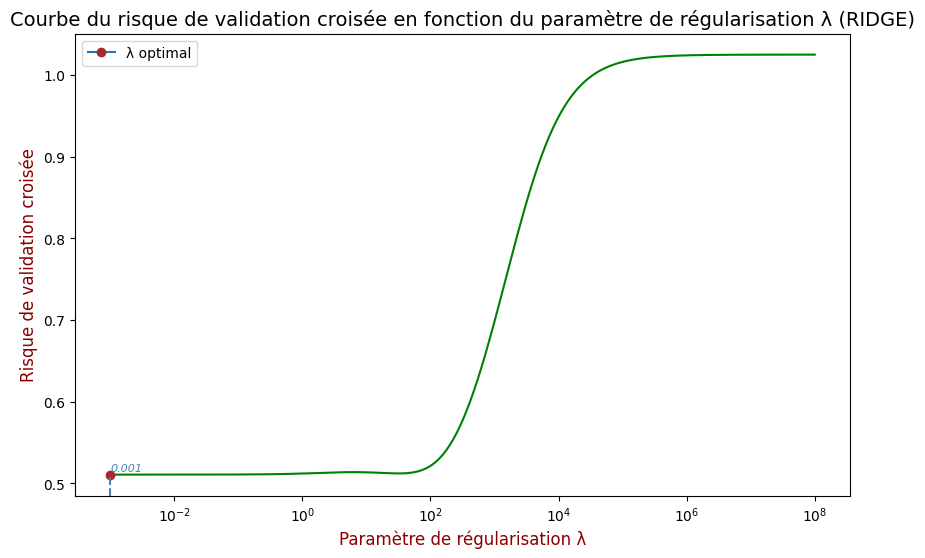

In [65]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(lambdas, list(MSE.values()), color='green')
ax.set_xscale('log')
ax.plot(λ_optimal, MSE[λ_optimal], marker='o', markeredgecolor='brown', markerfacecolor='brown', label="λ optimal")

axes = plt.gca()
x_min, x_max = axes.get_xlim()
y_min, y_max = axes.get_ylim()

ymax = (MSE[λ_optimal]-y_min)/(y_max-y_min)

plt.axvline(x=λ_optimal, ymin=0, ymax=ymax, linestyle='--', color='steelblue')

plt.text(λ_optimal, y_min+0.03, str(round(λ_optimal,5)), fontstyle='italic', color='steelblue', fontsize=8)

plt.title("Courbe du risque de validation croisée en fonction du paramètre de régularisation λ (RIDGE)", fontsize=14)
plt.xlabel('Paramètre de régularisation λ', color='darkred', fontsize=12)
plt.ylabel('Risque de validation croisée', color='darkred', fontsize=12)

plt.legend(loc='upper left')

plt.show()

La valeur du risque sur le test.

In [66]:
X_test = np.asarray(X_test)
y_test = np.asarray(y_test).reshape(-1,1)

In [67]:
# Normalisation
X_train_scaler = StandardScaler()
y_train_scaler = StandardScaler()

X_train_std = X_train_scaler.fit_transform(X_train) # Normalisation (X_train)
y_train_std = y_train_scaler.fit_transform(y_train) # Normalisation (y_train)
X_test_std = X_train_scaler.transform(X_test) # Normalisation (X_test)
y_test_std = y_train_scaler.transform(y_test) # Normalisation (y_test)

In [68]:
# Première méthode :
Mat = (X_train_std.T @ X_train_std) + λ_optimal*np.identity(X_train_std.shape[1])
inv_Mat = np.linalg.inv(Mat)
betas = inv_Mat @ X_train_std.T @ y_train_std
beta_0 = y_train_std.mean()

y_ridge_test_pred = beta_0 + X_test_std@betas
prediction_error_ridge = mean_squared_error(y_test_std, y_ridge_test_pred)

print("Le risque sur l'ensemble de test vaut : "+str(round(prediction_error_ridge, 6)))

Le risque sur l'ensemble de test vaut : 0.61044


In [69]:
# Deuxième méthode (avec sklearn) :
ridge_reg = Ridge(alpha = λ_optimal)
ridge_reg.fit(X_train_std, y_train_std)

y_ridge_pred = ridge_reg.predict(X_test_std)
prediction_error_ridge = mean_squared_error(y_test_std, y_ridge_pred)

print("Le risque sur l'ensemble de test vaut : "+str(round(prediction_error_ridge, 6)))

Le risque sur l'ensemble de test vaut : 0.61044


In [70]:
R2_Ridge = r2_score(y_test_std, y_ridge_pred)

print("Coefficient de détermination R2 (Ridge) = "+str(round(R2_Ridge*100, 2))+"%")

Coefficient de détermination R2 (Ridge) = 30.35%


Courbe des coefficients en fonction de λ :

In [71]:
ridge_coefficients = Ridge(alpha = lambdas[0]).fit(X_train_std, y_train_std).coef_

for λ in lambdas[1:]:
    ridge_reg = Ridge(alpha = λ)
    ridge_reg.fit(X_train_std, y_train_std)
    ridge_coefficients = np.append(ridge_coefficients, ridge_reg.coef_, axis=0)

ridge_coefficients = ridge_coefficients.T

ridge_coefficients.shape

(160, 200)

On sélectionne au hasard 10 coefficients parmi nos 160 coefficients :

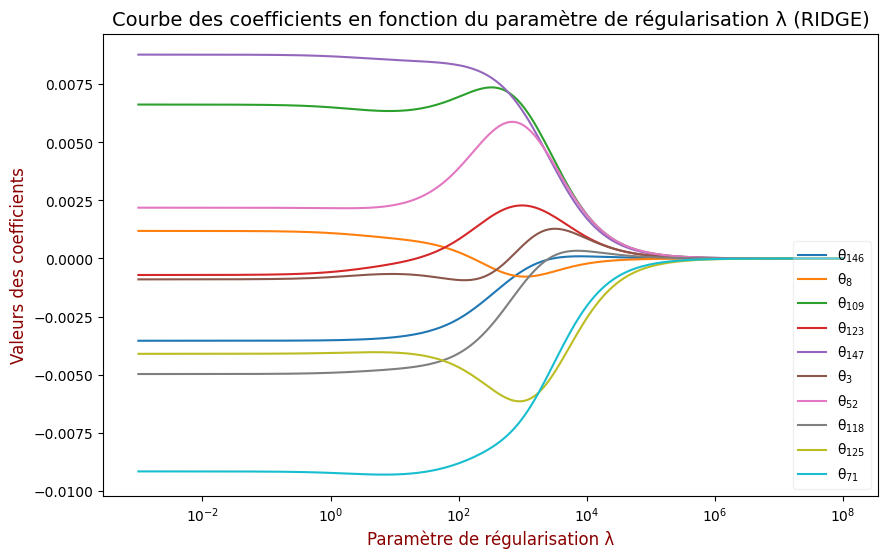

In [72]:
random.seed(10)
coefficients = random.sample(range(160), 10)

colors = iter([plt.cm.tab10(i) for i in range(10)])

fig, ax = plt.subplots(figsize=(10,6))

for i in range(len(coefficients)):
    ax.plot(lambdas, list(ridge_coefficients[coefficients[i]]), c=next(colors), label="θ$_{%d}$"%coefficients[i])
    ax.set_xscale('log')

plt.title("Courbe des coefficients en fonction du paramètre de régularisation λ (RIDGE)", fontsize=14)
plt.xlabel('Paramètre de régularisation λ', color='darkred', fontsize=12)
plt.ylabel('Valeurs des coefficients', color='darkred', fontsize=12)

plt.legend(loc='lower right', framealpha=0.3)

plt.show()

# Question 12 :

A l’aide de la fonction LassoCV de sklearn, choisir le paramètre de régularisation du LASSO. Donner
le risque de prédiction associé.

In [73]:
# Normalisation
X_train_scaler = StandardScaler()
y_train_scaler = StandardScaler()

X_train_std = X_train_scaler.fit_transform(X_train) # Normalisation (X_train)
y_train_std = y_train_scaler.fit_transform(y_train) # Normalisation (y_train)
X_test_std = X_train_scaler.transform(X_test) # Normalisation (X_test)
y_test_std = y_train_scaler.transform(y_test) # Normalisation (y_test)

In [74]:
lasso_reg = LassoCV(cv=5, random_state=10, n_alphas=300)
lasso_reg.fit(X_train_std, y_train_std[:,0])

# Première méthode :
alpha = lasso_reg.alpha_
print("Le paramètre de régularisation λ choisi par LassoCV = "+str(alpha))

Le paramètre de régularisation λ choisi par LassoCV = 0.03949988061180062


In [75]:
# Deuxième méthode :
alphas = lasso_reg.alphas_ # les paramètres de régularisation alphas
MSE = np.mean(lasso_reg.mse_path_, axis=1) # Moyenne des 5 risques de prédiction (sur les 5 folds de test) pour chaque alpha

print("Le paramètre de régularisation λ choisi par LassoCV = "+str(alphas[MSE.argmin()]))
print("Le risque de prédiction associé (Moyenne des risques sur les folds de test) = "+str(MSE.min()))

Le paramètre de régularisation λ choisi par LassoCV = 0.03949988061180062
Le risque de prédiction associé (Moyenne des risques sur les folds de test) = 0.4783588051796491


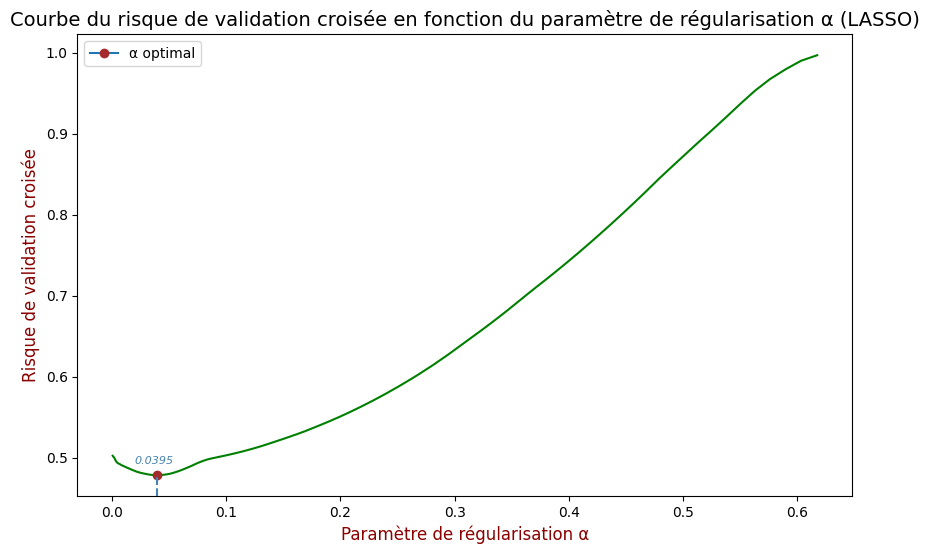

In [76]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(alphas, MSE, color='green')
ax.plot(alpha, MSE.min(), marker='o', markeredgecolor='brown', markerfacecolor='brown', label="α optimal")

axes = plt.gca()
x_min, x_max = axes.get_xlim()
y_min, y_max = axes.get_ylim()

ymax = (MSE.min()-y_min)/(y_max-y_min)

plt.axvline(x=alpha, ymin=0, ymax=ymax, linestyle='--', color='steelblue')

plt.text(alpha-0.02, y_min+0.04, str(round(alpha,5)), fontstyle='italic', color='steelblue', fontsize=8)

plt.title("Courbe du risque de validation croisée en fonction du paramètre de régularisation α (LASSO)", fontsize=14)
plt.xlabel('Paramètre de régularisation α', color='darkred', fontsize=12)
plt.ylabel('Risque de validation croisée', color='darkred', fontsize=12)

plt.legend(loc='upper left')

plt.show()

La valeur du risque sur le test.

In [77]:
y_lasso_pred = lasso_reg.predict(X_test_std)
prediction_error_lasso = mean_squared_error(y_test_std, y_lasso_pred)

print("Le risque sur l'ensemble de test vaut : "+str(round(prediction_error_lasso, 6)))

Le risque sur l'ensemble de test vaut : 0.593809


In [78]:
R2_Lasso = r2_score(y_test_std, y_lasso_pred)

print("Coefficient de détermination R2 (Lasso) = "+str(round(R2_Lasso*100, 2))+"%")

Coefficient de détermination R2 (Lasso) = 32.25%


Courbe des coefficients en fonction de α :

In [79]:
alphas = lasso_reg.alphas_

lasso_coefficients = Lasso(alpha = alphas[0], max_iter=100000).fit(X_train_std, y_train_std[:,0]).coef_.reshape(1,-1)

for α in alphas[1:]:
    lasso_regression = Lasso(alpha = α, max_iter=100000)
    lasso_regression.fit(X_train_std, y_train_std[:,0])
    lasso_coefficients = np.append(lasso_coefficients, lasso_regression.coef_.reshape(1,-1), axis=0)

lasso_coefficients = lasso_coefficients.T

lasso_coefficients.shape

(160, 300)

On sélectionne au hasard 20 coefficients parmi nos 160 coefficients :

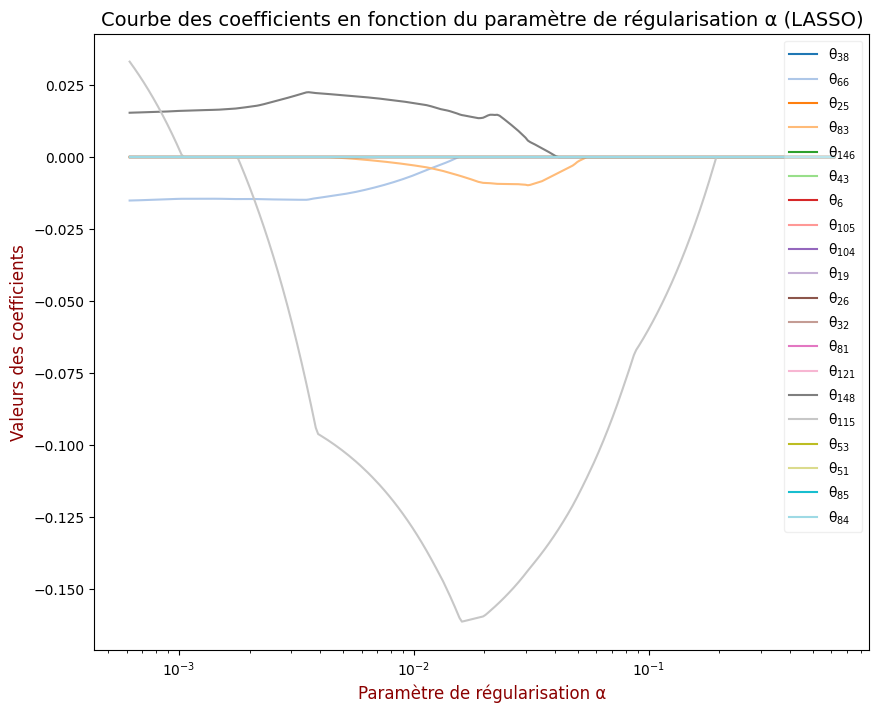

In [80]:
random.seed(20)
coefficients = random.sample(range(160), 20)

colors = iter([plt.cm.tab20(i) for i in range(20)])

fig, ax = plt.subplots(figsize=(10,8))

for i in range(len(coefficients)):
    ax.plot(alphas, list(lasso_coefficients[coefficients[i]]), c=next(colors), label="θ$_{%d}$"%coefficients[i])
    ax.set_xscale('log')
    
plt.title("Courbe des coefficients en fonction du paramètre de régularisation α (LASSO)", fontsize=14)
plt.xlabel('Paramètre de régularisation α', color='darkred', fontsize=12)
plt.ylabel('Valeurs des coefficients', color='darkred', fontsize=12)

plt.legend(loc='upper right', framealpha=0.3)

plt.show()

# Question 13 :

Donner les variables selectionées par le Lasso. Combien y en a-t-il ?

In [81]:
lasso_reg.coef_

array([ 0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.01648701, -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.33416953,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.00418746,  0.        ,  0.0053626 ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.  

On remarque qu'il y a plusieurs coefficients nuls. Les variables sélectionnées sont celles dont le coefficient n'est pas nul.

In [82]:
selected_variables = [index for index, value in enumerate(list(lasso_reg.coef_)) if value!=0]

selected_variables

[13, 23, 42, 44, 71, 82, 83, 88, 115, 122, 132, 136, 138, 139, 142, 148, 157]

Appliquer la méthode OLS aux
variables sélectionnées. Cette méthode est appelé Least-Square LASSO.

In [83]:
X_train_Lasso = X_train_std[:,selected_variables]
X_test_Lasso = X_test_std[:,selected_variables]

lasso_ols_reg = lm.LinearRegression(fit_intercept=True)
lasso_ols_reg.fit(X_train_Lasso, y_train_std)

y_test_Lasso_pred = lasso_ols_reg.predict(X_test_Lasso)
prediction_error_lasso_ols = mean_squared_error(y_test_std, y_test_Lasso_pred)

print("Le risque sur l'ensemble de test avec la méthode de Least-Square-LASSO = "+str(round(prediction_error_lasso_ols, 6)))

Le risque sur l'ensemble de test avec la méthode de Least-Square-LASSO = 0.619355


# Question 14 :

Les variables initiales du jeu de données sont [22, 82, 23, 132, 154, 79, 115, 73, 122, 13]. Combien
le Lasso en a-t-il retrouvé ?

In [84]:
liste_variables_initiales = [22, 82, 23, 132, 154, 79, 115, 73, 122, 13]

print("Lasso a retrouvé "+str(sum(x in selected_variables for x in liste_variables_initiales))+" variables")

Lasso a retrouvé 6 variables
